<a href="https://colab.research.google.com/github/shubham14yadav/Time-series-forecasting/blob/main/Time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


12
MSE: 3049.561964547518


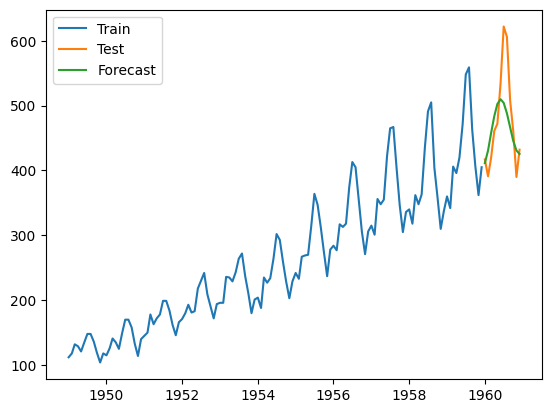

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data.set_index('Month', inplace=True)
air_passengers = data['Passengers']

# Splitting the dataset into train and test sets
train = air_passengers[:'1959']
test = air_passengers['1960':]

# Fit ARIMA model
model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()

# Forecasting future values
forecast = model_fit.forecast(steps=len(test))

# Checking the length of the forecast variable
print(len(forecast))

# Calculate mean squared error
mse = mean_squared_error(test, forecast)
print('MSE:', mse)

# Plot results
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()
